In [3]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 7.4 MB/s 
     |████████████████████████████████| 270 kB 56.1 MB/s 
     |████████████████████████████████| 212 kB 45.9 MB/s 
     |████████████████████████████████| 2.3 MB 41.3 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 112 kB 59.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 856 kB 48.8 MB/s 
     |████████████████████████████████| 594 kB 49.

In [4]:
#/
from fastai.vision.all import *
import gradio as gr

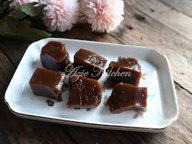

In [5]:
im =  PILImage.create('/content/dodol.jpg') 
im.thumbnail((192,192))
im

In [6]:
#/
# load pickle file 
learn = load_learner('/content/kuih02.pkl')

In [7]:
# predict image above to make sure our model are working
learn.predict(im)

('Dodol',
 TensorBase(6),
 TensorBase([0.0056, 0.0015, 0.0232, 0.0188, 0.0077, 0.0039, 0.6820, 0.0068,
             0.0250, 0.0016, 0.0401, 0.0100, 0.1094, 0.0008, 0.0026, 0.0401,
             0.0208]))

In [8]:
kuih,_,probs = learn.predict(im)
print(f"This is a: {kuih}")

This is a: Dodol


In [9]:
#/
# provide data from json file
with open('/content/kuih02.json', 'r') as f:
    data = json.load(f) 

In [10]:
# read data
data

[{'Name': 'Talam',
  'Category': 'Sweet',
  'Ingredient': 'Rice flour, Tapioca flour, Sugar, Pandan juice, Salt, Coconut milk',
  'Calories per piece': '180kcal'},
 {'Name': 'Seri Muka',
  'Category': 'Sweet',
  'Ingredient': 'Egg, Sugar, Plain flour, Tapioca flour, Coconut milk, Pandan juice, Glutinous rice, Salt',
  'Calories per piece': '180kcal'},
 {'Name': 'Tepung Pelita',
  'Category': 'Sweet',
  'Ingredient': 'Rice flour, Coconut milk, Sugar, Pandan juice, Salt',
  'Calories per piece': '100kcal'},
 {'Name': 'Onde-onde',
  'Category': 'Sweet',
  'Ingredient': 'Glutinous rice flour, Tapioca flour, Palm sugar, Pandan juice, Grated coconut, Salt',
  'Calories per piece': '20kcal'},
 {'Name': 'Abok-abok',
  'Category': 'Sweet',
  'Ingredient': 'Sago, Grated coconut, Palm sugar, Salt',
  'Calories per piece': '100kcal'},
 {'Name': 'Bingka Ubi',
  'Category': 'Savoury',
  'Ingredient': 'Egg, Sugar, Tapioca, Coconut milk',
  'Calories per piece': '180kcal'},
 {'Name': 'Bahulu',
  'Cate

In [19]:
#/
# function to print dessert ingredient from json file
def ingredient(kuih):
  case = ''
  for val in data:
    if val['Name'] == kuih:
      case = case + val['Ingredient']
  return case

In [20]:
#/
# function to print dessert calories from json file
def calories(kuih):
  box = ''
  for val in data:
    if val['Name'] == kuih:
      box = box + val['Calories per piece']
  return box

In [21]:
#/
# function to print dessert category from json file
def category(kuih):
  cat = ''
  for val in data:
    if val['Name'] == kuih:
      cat = cat + val['Category']
  return cat

In [22]:
#/
# function to classify images and print all informations
def classify_image (img):
  kuih,_,probs = learn.predict(img) 
  return ('Name:{0}\nCategory:{1}\nIngredients:{2}\nCalories:{3}'.format(kuih,category(kuih),ingredient(kuih),calories(kuih)))

In [23]:
# test the function 
classify_image(im)

'Name:Dodol\nCategory:Sweet\nIngredients:Coconut Milk, Glutinous rice flour, Palm sugar\nCalories:40kcal'

In [25]:
#/
# create gradio interface
title = 'Lets Find Out!'
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['/content/bingka.jpg','/content/dodol.jpg','/content/Cucur badak.jpg']

intf = gr.Interface(fn = classify_image, title = title ,inputs = image, outputs = ['text'], examples = examples)
intf.launch(debug=False)
# url in local computer, not yet in production

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://14782.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f7910122c90>,
 'http://127.0.0.1:7860/',
 'https://14782.gradio.app')

Next step is to copy all the cells marked with #/ into app.py file and push into HuggingFace Space repository